In [1]:
import os
from os.path import expanduser
from grouped_control_prediction.eval import main
from grouped_control_prediction.utils import data_utils as du
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/FlowCytometryTools-0.5.0-py3.6.egg/FlowCytometryTools/core/docstring.py:56: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  doc = dedent(doc)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/test_harness-3.3.2-py3.6.egg/harness/test_harness_class.py:23: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
# Set up data path
DATA_CONVERGE_PROJECT="sd2e-project-43"
data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'reactor_outputs', 'complete'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]

# Prediction Data
experiment_id="YeastSTATES-OR-Gate-CRISPR-Dose-Response"
process_dir = os.path.join(experiment_dir, experiment_id)
experiment_id_dir_contents = [os.path.realpath(os.path.join(process_dir, x)) for x in os.listdir(process_dir)]
experiment_id_dir_contents.sort()
last_process = experiment_id_dir_contents[-1]
prediction_dataset = last_process[last_process.find(experiment_id):].replace("/", "_")
print("Prediction Dataset: " + prediction_dataset)

Prediction Dataset: YeastSTATES-OR-Gate-CRISPR-Dose-Response_20200625204022


In [3]:
# Get the data and metadata
df = du.get_data_and_metadata(last_process)
meta = du.get_meta(last_process, du.get_record(last_process))
meta = meta.rename(columns={'well':'well_id'})

# Inspect dataframe shape and experiment IDs
print(df.shape)
print(df.experiment_id.unique())

In [5]:
avg_distances = []
test_accuracies = []
od_losses = []
od_accuracies = []
sample_size = []

# Run grouped control prediction
project_id = "sd2e-project-14"
low_control = "CRISPR_CEN.PK2_negative_control_23970"
high_control = "CRISPR_CEN.PK2_positive_control_NOR_00_24864"
weighted_controls = True
wass_path = "data/" + prediction_dataset + ".pkl"

sizes = [5,10,15,20,25]
replicates = 5

for control_size in sizes:
    print("Size " + str(control_size))
    for i in range(replicates):
        print("Replicate " + str(i+1))
        result, avg_dist, test_accuracy, od_loss, od_accuracy = main(last_process,
                             df,
                             meta,
                             project_id,
                             low_control,
                             high_control,
                             weighted_controls,
                             wass_path,
                             control_size)
        
        avg_distances.append(avg_dist)
        test_accuracies.append(test_accuracy)
        od_losses.append(od_loss)
        od_accuracies.append(od_accuracy)
        sample_size.append(control_size)

Size 5
Replicate 1
top_n
Average control distance: 72.58067239031156
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/5(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/5(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/5(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/5(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/5(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:11:50 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 12.13 seconds
Testing time was: 0.45 seconds
Prediction time of untested data was: 50.79637622833252
Run finished at 17:13:42. Total run time = 112.31 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 2
top_n
Average control distance: 72.58067239031156
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/5(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/5(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/5(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/5(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/5(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:14:50 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 11.94 seconds
Testing time was: 0.45 seconds
Prediction time of untested data was: 66.16795468330383
Run finished at 17:17:06. Total run time = 135.37 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 3
top_n
Average control distance: 72.58067239031156
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/5(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/5(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/5(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/5(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/5(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:18:18 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 12.35 seconds
Testing time was: 0.55 seconds
Prediction time of untested data was: 57.60216474533081
Run finished at 17:20:31. Total run time = 133.08 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 4
top_n
Average control distance: 72.58067239031156
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/5(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/5(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/5(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/5(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/5(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:21:55 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 12.14 seconds
Testing time was: 0.56 seconds
Prediction time of untested data was: 52.16849493980408
Run finished at 17:23:50. Total run time = 114.94 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 5
top_n
Average control distance: 72.58067239031156
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/5(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/5(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/5(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/5(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/5(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:25:00 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 11.84 seconds
Testing time was: 0.45 seconds
Prediction time of untested data was: 65.93587446212769
Run finished at 17:27:12. Total run time = 132.50 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Size 10
Replicate 1
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:29:46 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 28.28 seconds
Testing time was: 0.88 seconds
Prediction time of untested data was: 58.288310527801514
Run finished at 17:32:18. Total run time = 152.15 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 2
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:34:58 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 26.69 seconds
Testing time was: 0.92 seconds
Prediction time of untested data was: 54.831249952316284
Run finished at 17:37:16. Total run time = 137.84 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 3
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:39:40 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 26.78 seconds
Testing time was: 0.89 seconds
Prediction time of untested data was: 51.38151526451111
Run finished at 17:41:50. Total run time = 130.06 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 4
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:44:14 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 26.50 seconds
Testing time was: 9.77 seconds
Prediction time of untested data was: 54.84161829948425
Run finished at 17:46:44. Total run time = 150.46 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 5
top_n
Average control distance: 73.45163779851973
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/10(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/10(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/10(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/10(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/10(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/10(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/10(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/10(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/10(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/10(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:49:13 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 26.65 seconds
Testing time was: 0.88 seconds
Prediction time of untested data was: 54.051851987838745
Run finished at 17:51:26. Total run time = 133.33 seconds
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^






/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Size 15
Replicate 1
top_n
Average control distance: 73.8902440303581
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/15(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/15(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/15(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/15(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/15(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/15(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/15(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/15(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/15(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/15(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/15(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/15(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/15(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/15(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/15(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 17:54:59 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 44.67 seconds
Testing time was: 1.31 seconds
Prediction time of untested data was: 58.41665816307068
Run finished at 17:57:48. Total run tim

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 2
top_n
Average control distance: 73.8902440303581
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/15(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/15(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/15(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/15(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/15(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/15(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/15(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/15(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/15(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/15(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/15(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/15(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/15(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/15(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/15(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:01:41 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 44.27 seconds
Testing time was: 1.31 seconds
Prediction time of untested data was: 53.49380087852478
Run finished at 18:04:13. Total run tim

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 3
top_n
Average control distance: 73.8902440303581
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/15(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/15(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/15(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/15(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/15(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/15(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/15(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/15(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/15(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/15(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/15(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/15(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/15(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/15(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/15(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:07:39 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 43.66 seconds
Testing time was: 1.31 seconds
Prediction time of untested data was: 71.90865850448608
Run finished at 18:10:39. Total run tim

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 4
top_n
Average control distance: 73.8902440303581
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/15(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/15(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/15(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/15(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/15(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/15(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/15(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/15(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/15(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/15(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/15(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/15(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/15(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/15(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/15(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:14:21 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 53.76 seconds
Testing time was: 1.33 seconds
Prediction time of untested data was: 57.7439751625061
Run finished at 18:17:20. Total run time

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 5
top_n
Average control distance: 73.8902440303581
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/15(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/15(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/15(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/15(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/15(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/15(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/15(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/15(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/15(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/15(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/15(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/15(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/15(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/15(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/15(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:20:51 at time random_forest_classification
Normalizing training and testing splits...
Starting Classification training...
Training time was: 43.94 seconds
Testing time was: 1.32 seconds
Prediction time of untested data was: 64.01357245445251
Run finished at 18:23:38. Total run tim

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Size 20
Replicate 1
top_n
Average control distance: 74.2745113784085
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/20(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/20(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/20(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/20(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/20(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/20(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/20(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/20(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/20(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/20(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/20(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/20(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/20(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/20(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/20(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/20(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/20(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/20(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/20(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/20(r1ce3pqt45vfe_r1ce7qf5e483u.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:28:37 at time random_forest_classification
Normalizing training and testing splits

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 2
top_n
Average control distance: 74.2745113784085
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/20(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/20(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/20(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/20(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/20(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/20(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/20(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/20(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/20(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/20(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/20(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/20(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/20(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/20(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/20(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/20(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/20(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/20(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/20(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/20(r1ce3pqt45vfe_r1ce7qf5e483u.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:37:01 at time random_forest_classification
Normalizing training and testing splits

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 3
top_n
Average control distance: 74.2745113784085
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/20(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/20(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/20(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/20(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/20(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/20(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/20(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/20(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/20(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/20(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/20(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/20(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/20(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/20(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/20(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/20(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/20(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/20(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/20(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/20(r1ce3pqt45vfe_r1ce7qf5e483u.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:44:44 at time random_forest_classification
Normalizing training and testing splits

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 4
top_n
Average control distance: 74.2745113784085
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/20(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/20(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/20(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/20(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/20(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/20(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/20(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/20(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/20(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/20(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/20(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/20(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/20(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/20(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/20(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/20(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/20(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/20(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/20(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/20(r1ce3pqt45vfe_r1ce7qf5e483u.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 18:53:10 at time random_forest_classification
Normalizing training and testing splits

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 5
top_n
Average control distance: 74.2745113784085
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/20(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/20(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/20(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/20(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/20(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/20(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/20(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/20(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/20(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/20(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/20(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/20(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/20(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/20(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/20(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/20(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/20(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/20(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/20(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/20(r1ce3pqt45vfe_r1ce7qf5e483u.csv)

----------------------------------------------------------------------------------------------------
Starting run of model 19:00:54 at time random_forest_classification
Normalizing training and testing splits

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Size 25
Replicate 1
top_n
Average control distance: 74.63708622212877
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/25(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/25(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/25(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/25(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/25(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/25(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/25(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/25(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/25(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/25(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/25(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/25(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/25(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/25(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/25(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/25(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/25(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/25(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/25(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/25(r1ce3pqt45vfe_r1ce7qf5e483u.csv)
21/25(r1c5vad8u7ve2_r1c66q7cru28u.csv)
22/25(r1c5vac658fxn_r1c66qw595ydy.csv)
23/25(r1ce3ppkyswxf_r1ce7qk6h482m.csv)
24/25(r1d6r8ztq8zfa7_r1d952nn9xk753.csv)
25/25(r1c7cppfr7yp6_r1c7jnv3pkbsj.csv)

-----------

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 2
top_n
Average control distance: 74.63708622212877
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/25(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/25(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/25(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/25(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/25(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/25(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/25(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/25(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/25(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/25(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/25(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/25(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/25(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/25(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/25(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/25(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/25(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/25(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/25(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/25(r1ce3pqt45vfe_r1ce7qf5e483u.csv)
21/25(r1c5vad8u7ve2_r1c66q7cru28u.csv)
22/25(r1c5vac658fxn_r1c66qw595ydy.csv)
23/25(r1ce3ppkyswxf_r1ce7qk6h482m.csv)
24/25(r1d6r8ztq8zfa7_r1d952nn9xk753.csv)
25/25(r1c7cppfr7yp6_r1c7jnv3pkbsj.csv)

-----------

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 3
top_n
Average control distance: 74.63708622212877
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/25(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/25(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/25(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/25(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/25(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/25(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/25(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/25(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/25(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/25(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/25(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/25(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/25(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/25(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/25(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/25(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/25(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/25(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/25(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/25(r1ce3pqt45vfe_r1ce7qf5e483u.csv)
21/25(r1c5vad8u7ve2_r1c66q7cru28u.csv)
22/25(r1c5vac658fxn_r1c66qw595ydy.csv)
23/25(r1ce3ppkyswxf_r1ce7qk6h482m.csv)
24/25(r1d6r8ztq8zfa7_r1d952nn9xk753.csv)
25/25(r1c7cppfr7yp6_r1c7jnv3pkbsj.csv)

-----------

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 4
top_n
Average control distance: 74.63708622212877
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/25(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/25(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/25(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/25(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/25(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/25(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/25(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/25(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/25(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/25(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/25(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/25(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/25(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/25(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/25(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/25(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/25(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/25(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/25(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/25(r1ce3pqt45vfe_r1ce7qf5e483u.csv)
21/25(r1c5vad8u7ve2_r1c66q7cru28u.csv)
22/25(r1c5vac658fxn_r1c66qw595ydy.csv)
23/25(r1ce3ppkyswxf_r1ce7qk6h482m.csv)
24/25(r1d6r8ztq8zfa7_r1d952nn9xk753.csv)
25/25(r1c7cppfr7yp6_r1c7jnv3pkbsj.csv)

-----------

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Replicate 5
top_n
Average control distance: 74.63708622212877
Grouping sampled control sets...


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


1/25(r1dfxeycahns9y_r1dg8u3z9yzuuq.csv)
2/25(r1ce3p3p7j77n_r1ceevbnsqku2.csv)
3/25(r1dgppew9w7j7p_r1dgwudtwth732.csv)
4/25(r1ce3p4vgfu3p_r1ceebve8d6tc.csv)
5/25(r1dgppdqbd2mmk_r1dgwy63p8x5uz.csv)
6/25(r1cckyeq9r358_r1ccqgmy5ffcd.csv)
7/25(r1dgppg46aeknn_r1dgwpywx6rtc8.csv)
8/25(r1cfkpq8n84aj_r1cftg78pbqd7.csv)
9/25(r1df5qs7jb4fwq_r1dff64wwmq4gt.csv)
10/25(r1dfxezj7aae4s_r1dg5dthycwjb7.csv)
11/25(r1cdfr4bjcnrg_r1cdnuqex83dm.csv)
12/25(r1d6r8mvznxxme_r1d8jxmssfag5w.csv)
13/25(r1cwvvwryt3q49_r1cx4ux3zcdt4w.csv)
14/25(r1cdhymqfs6b3_r1cdnzf4hbuz2.csv)
15/25(r1cfkpuz2kr6c_r1cfpvk5hjkzb.csv)
16/25(r1dfxex6e5ekjv_r1dg94zgbvxe7r.csv)
17/25(r1ce3p63vnpzq_r1cee5f7knupg.csv)
18/25(r1ceuhu9enre5_r1cf33y4j6dyg.csv)
19/25(r1d6r932unhafk_r1d93nuytthhp4.csv)
20/25(r1ce3pqt45vfe_r1ce7qf5e483u.csv)
21/25(r1c5vad8u7ve2_r1c66q7cru28u.csv)
22/25(r1c5vac658fxn_r1c66qw595ydy.csv)
23/25(r1ce3ppkyswxf_r1ce7qk6h482m.csv)
24/25(r1d6r8ztq8zfa7_r1d952nn9xk753.csv)
25/25(r1c7cppfr7yp6_r1c7jnv3pkbsj.csv)

-----------

/work/07431/rmahtab/jupyter_packages/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# Store output in dataframe
output = pd.DataFrame()
output['Average Distance'] = avg_distances
output['Test Accuracy'] = test_accuracies
output['Optical Density Mean Loss'] = od_losses
output['Optical Density Accuracy'] = od_accuracies
output['Sample Size'] = sample_size
output

In [8]:
# Save output as pickled file
output.to_pickle("notebook_data/sample_size_eval/weighted/top_n_" + prediction_dataset + ".pkl")

In [9]:
# Read in pickled data to generate plots
all_output = pd.DataFrame()
folder = "notebook_data/sample_size_eval/weighted/"
all_output = pickle.load(open(folder + "top_n_" + prediction_dataset + ".pkl", "rb"))

In [10]:
all_output

,Average Distance,Test Accuracy,Optical Density Mean Loss,Optical Density Accuracy,Sample Size
0,72.580672,0.973,7.673923,0.913793,5
1,72.580672,0.973,7.700273,0.913793,5
2,72.580672,0.973,7.673091,0.913793,5
3,72.580672,0.973,7.655225,0.913793,5
4,72.580672,0.973,7.714015,0.913793,5
5,73.451638,0.969,6.761507,0.913793,10
6,73.451638,0.970,6.801721,0.913793,10
7,73.451638,0.970,6.796469,0.913793,10
8,73.451638,0.970,6.827517,0.913793,10
9,73.451638,0.969,6.758107,0.913793,10


In [11]:
sample_size_weighted_grouped = all_output.groupby(['Sample Size']).agg([np.mean, np.std])
sample_size_weighted_grouped

Average Distance      Test Accuracy           Optical Density Mean Loss           Optical Density Accuracy     
                        mean  std          mean       std                      mean       std                     mean  std
Sample Size                                                                                                                
5            72.580672        0.0  0.9730        0.000000  7.683306                  0.023515  0.913793                 0.0
10           73.451638        0.0  0.9696        0.000548  6.789064                  0.029204  0.913793                 0.0
15           73.890244        0.0  0.9670        0.000000  6.595412                  0.011212  0.913793                 0.0
20           74.274511        0.0  0.9700        0.000000  6.466040                  0.006286  0.913793                 0.0
25           74.637086        0.0  0.9700        0.000000  6.476371                  0.010416  0.913793                 0.0

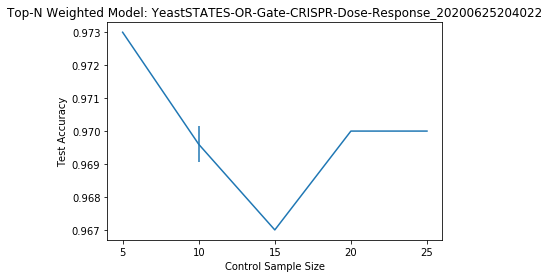

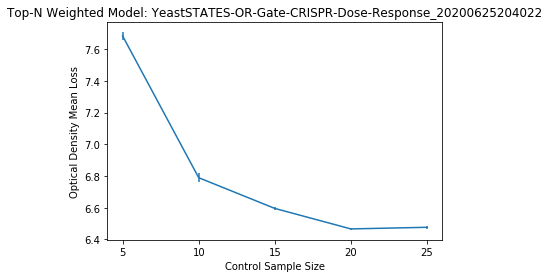

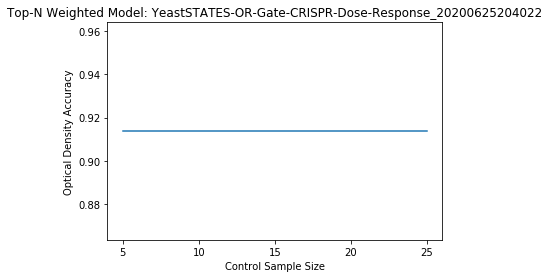

In [12]:
plt.errorbar(sample_size_weighted_grouped.index,
             sample_size_weighted_grouped['Test Accuracy']['mean'],
             yerr=sample_size_weighted_grouped['Test Accuracy']['std'])
plt.title('Top-N Weighted Model: ' + prediction_dataset)
plt.xlabel('Control Sample Size')
plt.ylabel('Test Accuracy')
plt.xticks(np.arange(5, 30, step=5))
plt.show()

plt.errorbar(sample_size_weighted_grouped.index,
             sample_size_weighted_grouped['Optical Density Mean Loss']['mean'],
             yerr=sample_size_weighted_grouped['Optical Density Mean Loss']['std'])
plt.title('Top-N Weighted Model: ' + prediction_dataset)
plt.xlabel('Control Sample Size')
plt.ylabel('Optical Density Mean Loss')
plt.xticks(np.arange(5, 30, step=5))
plt.show()

plt.errorbar(sample_size_weighted_grouped.index,
             sample_size_weighted_grouped['Optical Density Accuracy']['mean'],
             yerr=sample_size_weighted_grouped['Optical Density Accuracy']['std'])
plt.title('Top-N Weighted Model: ' + prediction_dataset)
plt.xlabel('Control Sample Size')
plt.ylabel('Optical Density Accuracy')
plt.xticks(np.arange(5, 30, step=5))
plt.show()

In [13]:
all_output.shape

(25, 5)

In [14]:
sample_size_weighted_grouped.shape

(5, 8)